# 1. World Life Expectancy Prediction 

**Predictor Variable:**
* Life Expectancy 

**Input Features:**
* Year
* Adult Mortality
* Status
* Infant Mortality
* Alcohol Consumption
* Hepatitis B

**Model:** Linear Regression 

**Data source:** WHO and UN

# 2. Import dataset and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme = 'solarizedd', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be solarizedd theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [4]:
# Read the csv file 
life_expectancy_df = pd.read_csv('life_expectancy_data.csv')

In [5]:
# View the dataframe
life_expectancy_df

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937     

# 3. Exploratory data analysis

<AxesSubplot:>

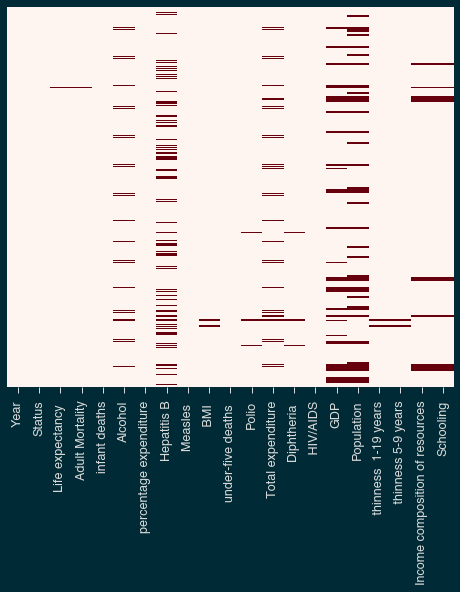

In [6]:
# Check if there are any Null values
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Reds")

In [7]:
# Check the dataframe info
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [8]:
# Statistical summary of the dataframe
life_expectancy_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

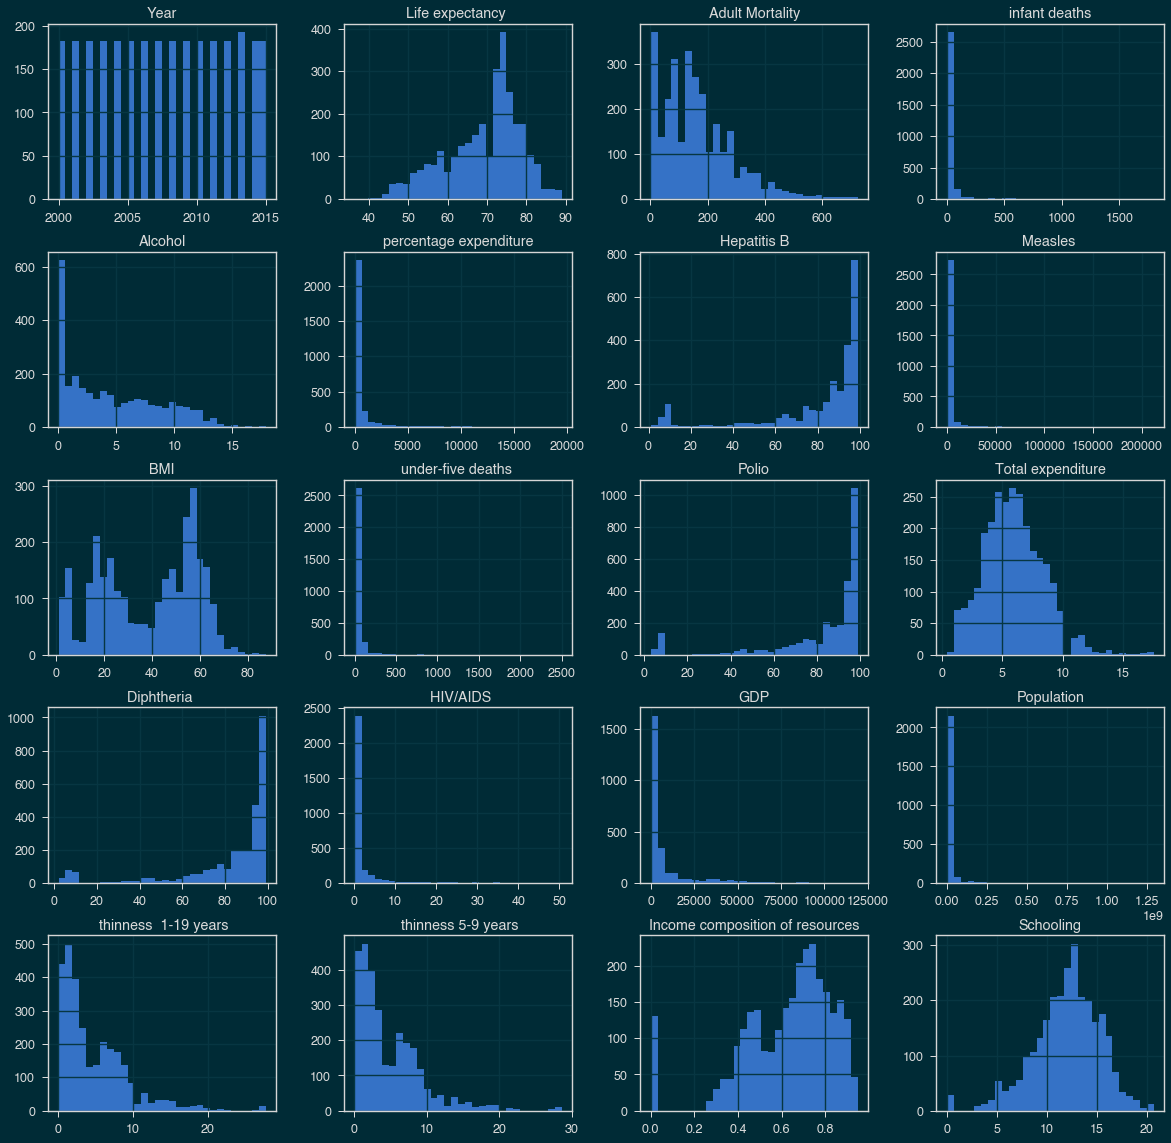

In [9]:
# Plot the histogram
life_expectancy_df.hist(bins = 30, figsize = (20, 20), color = 'b');


<Figure size 2880x2880 with 0 Axes>

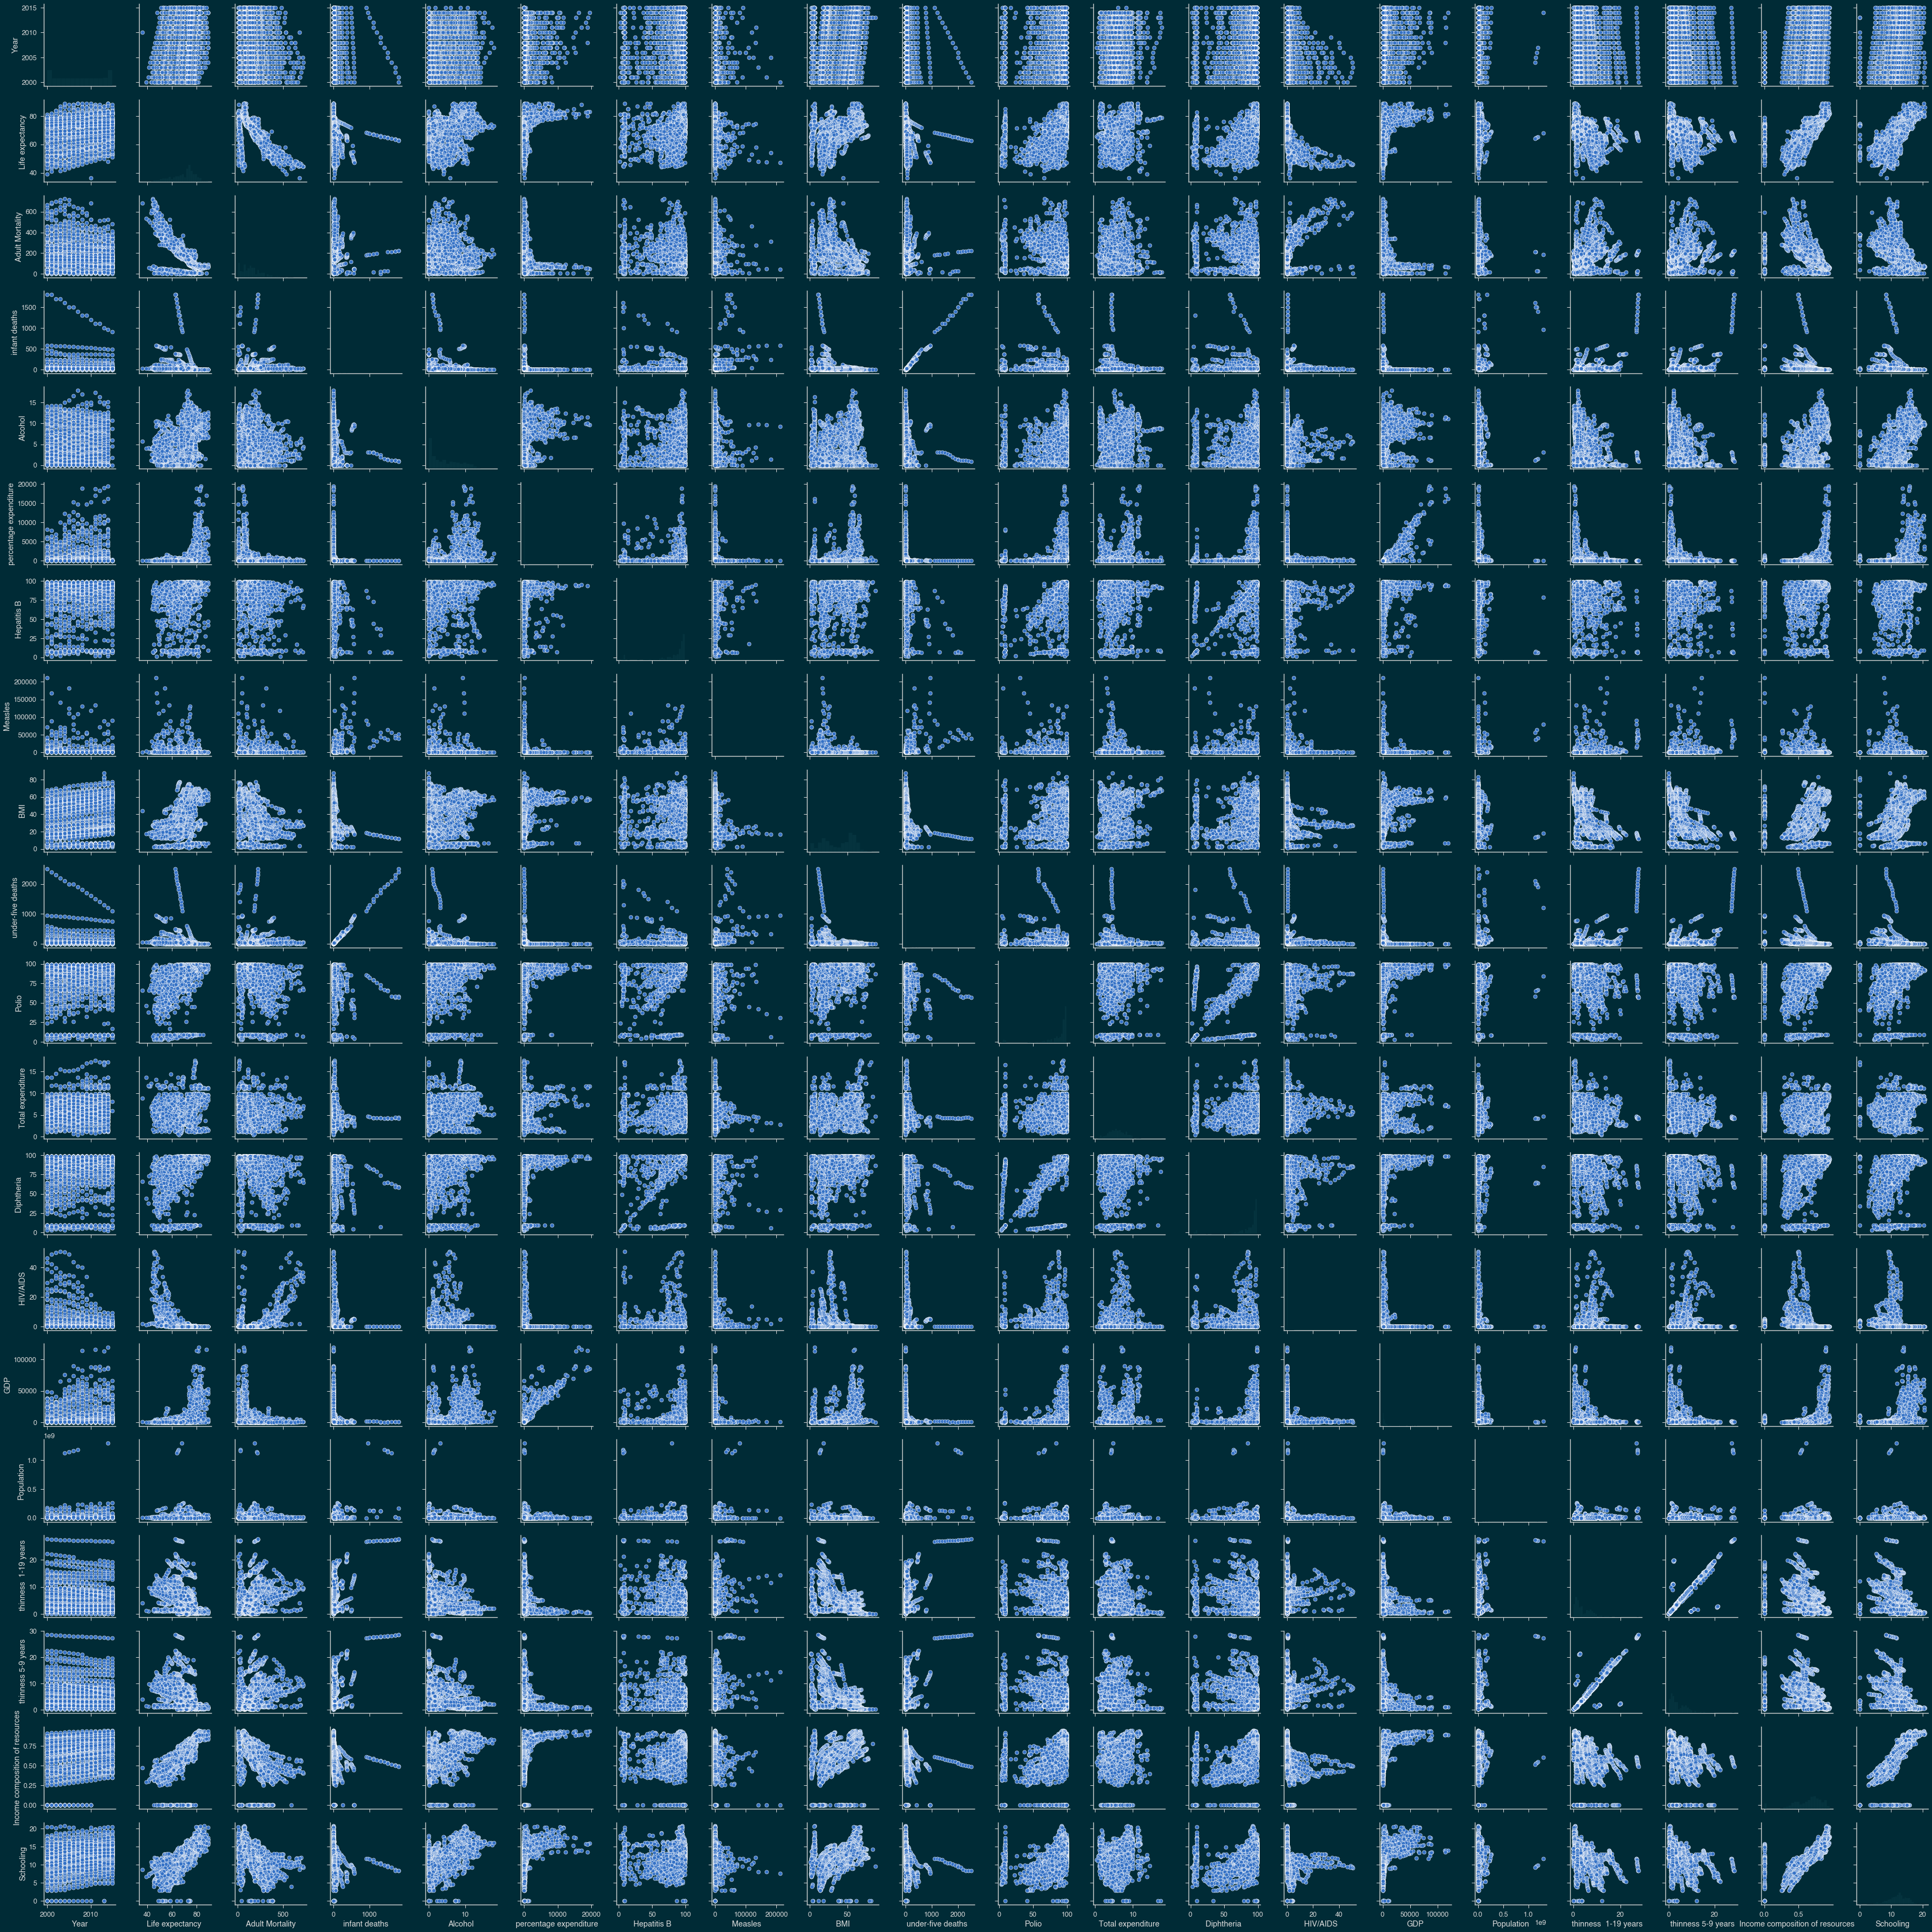

In [10]:
# Plot pairplot to see all columns plotted against each other
plt.figure(figsize = (40,40))
sns.pairplot(life_expectancy_df)

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

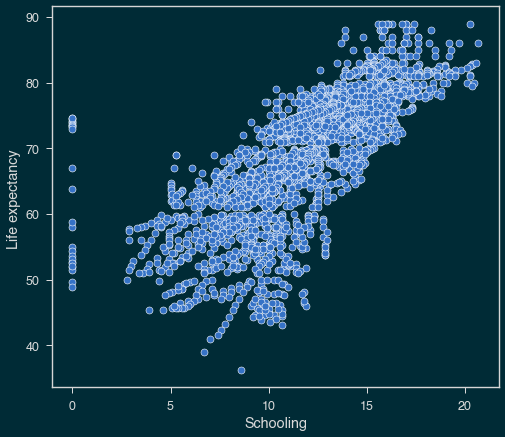

In [11]:
# Plot Schooling versus Life Expectancy
sns.scatterplot(data = life_expectancy_df, x = 'Schooling', y = 'Life expectancy ')

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

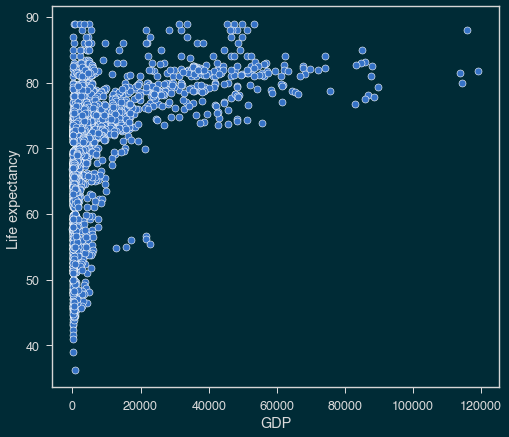

In [12]:
# GDP versus Life Expectancy
sns.scatterplot(data = life_expectancy_df, x = 'GDP', y = 'Life expectancy ')

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

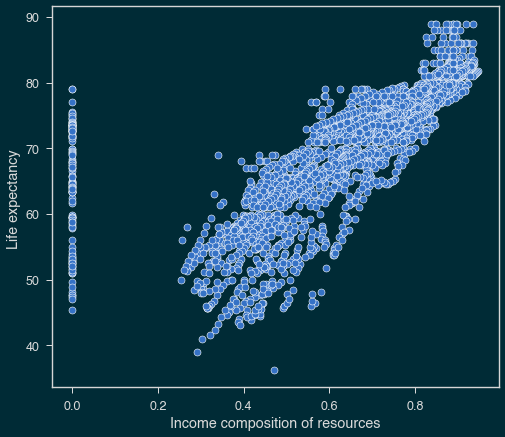

In [13]:
# How productive resources are used?
sns.scatterplot(data = life_expectancy_df, x = 'Income composition of resources', y = 'Life expectancy ')


<AxesSubplot:xlabel=' HIV/AIDS', ylabel='Life expectancy '>

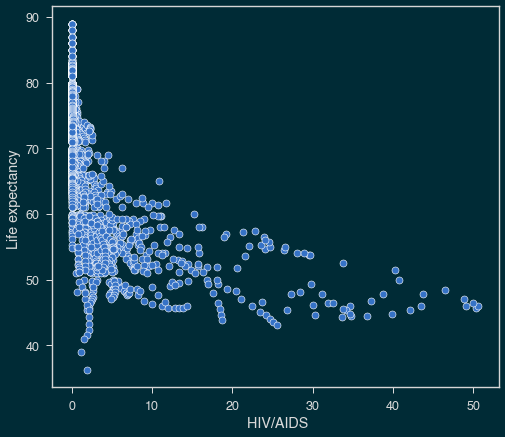

In [14]:
# Naturelly, as HIV/AIDs death rate increases, life expectancy is reduced
sns.scatterplot(data = life_expectancy_df, x = ' HIV/AIDS', y = 'Life expectancy ')


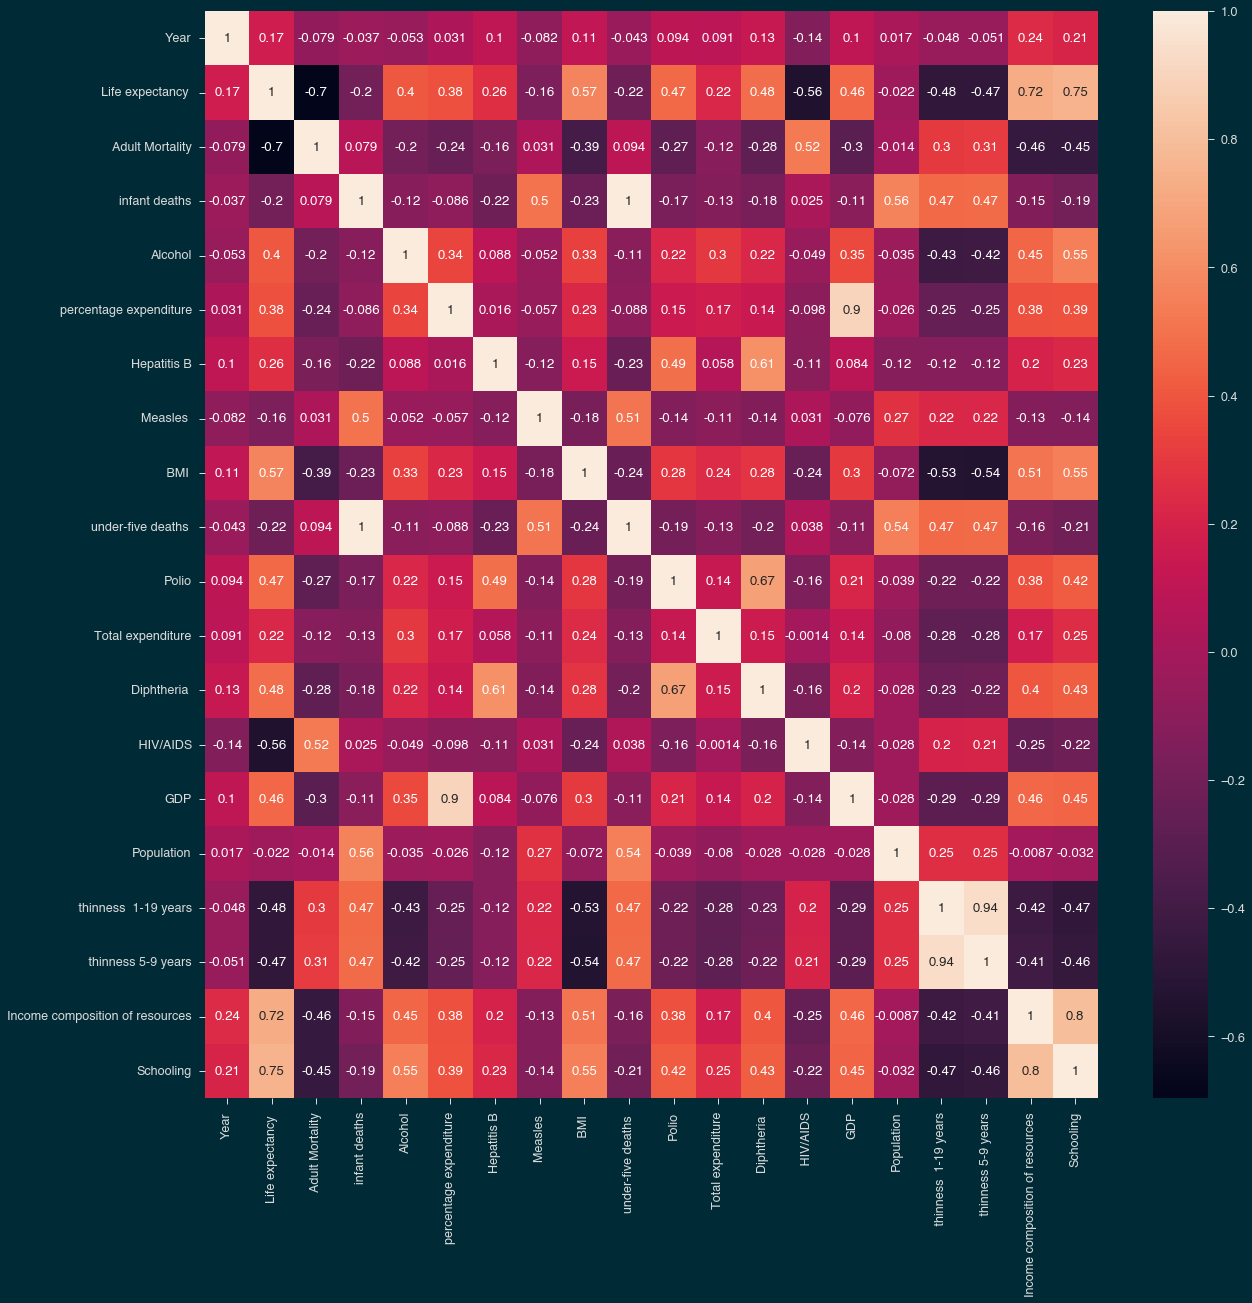

In [15]:
# Plot the correlation matrix to quantify the relationship
plt.figure(figsize = (20,20))
corr_matrix = life_expectancy_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [16]:
# Checking the unique values in the Status column
life_expectancy_df['Status'].nunique()

2

In [17]:
# Looking at potential categorical data selections: unique values in the 'Status' column. 
life_expectancy_df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [18]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'], drop_first=False)

In [19]:
# View one-hot encoding
life_expectancy_df[['Status_Developed', 'Status_Developing']].head()

Status_Developed  Status_Developing
0                 0                  1
1                 0                  1
2                 0                  1
3                 0                  1
4                 0                  1

### Deal with NULLs

In [20]:
# Check the number of nulls in each column
print('Show all columns:')
print(' ')
print(life_expectancy_df.isnull().sum())
print('-'*70)
print('')
# Note the below code gets a list of column indexes where there are nulls
print('Show null-containing column indexs: ', np.where(life_expectancy_df.isnull().sum() != 0)[0])
print(' ')
print('-'*70)
print(' ')
print('---- Check the number of null values in the columns that have them ---')
print(' ')
# Put it all together: check the number of null values for the columns having null values
print(life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]])


Show all columns:
 
Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64
----------------------------------------------------------------------

Show null-containing column indexs:  

In [21]:
# Since all columns are now continous values we fill them with the mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)


In [22]:
# Since we filled the nulls above with the average, we can check the nulls again...
# ...there are now no nulls
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]
print(life_expectancy_df.isnull().sum())


Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64


In [23]:
# Look at the maxium life expectancy 
life_expectancy_df['Life expectancy '].max()

89.0

In [24]:
# Let's look at the dataframe's general stats again
life_expectancy_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.507640       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.000000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    80.940461       0.000000   
50%       4.160000               64.912906    87.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths   ...  Diphtheria      HIV/AIDS  \
count  2938.000000         2938.000000  ...  2938.000000  2938.000000   
mean     38.321247           42.035739  ...    82.324084     1.742103   
std      19.927677          160.445548  ...    23.640073     5.077785   
min       1.000000            0.000000  ...     2.000000     0.100000   
25%      19.400000            0.000000  ...    78.000000     0.100000   
50%      43.000000            4.000000  ...    93.000000     0.100000   
75%      56.100000           28.000000  ...    97.000000     0.800000   
max      87.300000         2500.000000  ...    99.000000    50.600000   

                 GDP    Population   thinness  1-19 years  \
count    2938.000000  2.938000e+03            2938.000000   
mean     7483.158469  1.275338e+07               4.839704   
std     13136.800417  5.381546e+07               4.394535   
min         1.681350  3.400000e+01               0.100000   
25%       580.486996  4.189172e+05               1.600000   
50%      3116.561755  3.675929e+06               3.400000   
75%      7483.158469  1.275338e+07               7.100000   
max    119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  \
count          2938.000000                      2938.000000  2938.000000   
mean              4.870317                         0.627551    11.992793   
std               4.482708                         0.204820     3.264381   
min               0.100000                         0.000000     0.000000   
25%               1.600000                         0.504250    10.300000   
50%               3.400000                         0.662000    12.100000   
75%               7.200000                         0.772000    14.100000   
max              28.600000                         0.948000    20.700000   

       Status_Developed  Status_Developing  
count       2938.000000        2938.000000  
mean           0.174268           0.825732  
std            0.379405           0.379405  
min            0.000000           0.000000  
25%            0.000000           1.000000  
50%            0.000000           1.000000  
75%            0.000000           1.000000  
max            1.000000           1.000000  

[8 rows x 22 columns]

# 4. Create training and test set

In [25]:
# Create the training and test data
X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]


In [26]:
# Look at the predictor variables
X

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
...    ...              ...            ...      ...                     ...   
2933  2004            723.0             27     4.36                0.000000   
2934  2003            715.0             26     4.06                0.000000   
2935  2002             73.0             25     4.43                0.000000   
2936  2001            686.0             25     1.72                0.000000   
2937  2000            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0            65.0      1154   19.1                  83    6.0  ...   
1            62.0       492   18.6                  86   58.0  ...   
2            64.0       430   18.1                  89   62.0  ...   
3            67.0      2787   17.6                  93   67.0  ...   
4            68.0      3013   17.2                  97   68.0  ...   
...           ...       ...    ...                 ...    ...  ...   
2933         68.0        31   27.1                  42   67.0  ...   
2934          7.0       998   26.7                  41    7.0  ...   
2935         73.0       304   26.3                  40   73.0  ...   
2936         76.0       529   25.9                  39   76.0  ...   
2937         79.0      1483   25.5                  39   78.0  ...   

      Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0            65.0        0.1  584.259210  33736494.0                   17.2   
1            62.0        0.1  612.696514    327582.0                   17.5   
2            64.0        0.1  631.744976  31731688.0                   17.7   
3            67.0        0.1  669.959000   3696958.0                   17.9   
4            68.0        0.1   63.537231   2978599.0                   18.2   
...           ...        ...         ...         ...                    ...   
2933         65.0       33.6  454.366654  12777511.0                    9.4   
2934         68.0       36.7  453.351155  12633897.0                    9.8   
2935         71.0       39.8   57.348340    125525.0                    1.2   
2936         75.0       42.1  548.587312  12366165.0                    1.6   
2937         78.0       43.5  547.358879  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  \
0                    17.3                            0.479       10.1   
1                    17.5                            0.476       10.0   
2                    17.7                            0.470        9.9   
3                    18.0                            0.463        9.8   
4                    18.2                            0.454        9.5   
...                   ...                              ...        ...   
2933                  9.4                            0.407        9.2   
2934                  9.9                            0.418        9.5   
2935                  1.3                            0.427       10.0   
2936                  1.7                            0.427        9.8   
2937                 11.2                            0.434        9.8   

      Status_Developed  Status_Developing  
0                    0                  1  
1                    0                  1  
2                    0                  1  
3                    0                  1  
4                    0                  1  
...                ...                ...  
2933                 0                  1  
2934                 0                

In [27]:
# Look at the first 10 rows of the outcome variable
y[:10]

Life expectancy 
0              65.0
1              59.9
2              59.9
3              59.5
4              59.2
5              58.8
6              58.6
7              58.1
8              57.5
9              57.3

In [28]:
# Look at the shape, of the predictor and outcome variables. 
X.shape

(2938, 21)

In [29]:
y.shape

(2938, 1)

In [30]:
# Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [31]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [32]:
X_train.shape

(2203, 21)

In [33]:
X_test.shape

(735, 21)

In [34]:
# Scale the data 
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 5. Train a Linear Regression model using sklearn

In [35]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# fit_intercept = False means intercept is 0. True means it starts where the 
# equation dictates
regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [36]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.810649499255186

In [37]:
# The key metrics y = b0 + b1*x1 + b2*x2...bn*xn
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[ 6.51183480e-04 -2.59505719e-01  1.26547492e+00  1.87467579e-02
   2.36882269e-02 -3.04380972e-02 -2.54861936e-02  1.06131002e-01
  -1.28557575e+00  6.25547990e-02  2.31044702e-02  9.47059095e-02
  -2.53186166e-01  3.43678184e-02  1.12902804e-03 -4.07517701e-02
   7.75053352e-03  1.10932924e-01  2.39671826e-01  3.32401916e-02
  -3.32401916e-02]]
Linear Model Coefficient (b):  [-1.4515578e-07]


# 6. Evaluate the trained model's performance

In [38]:
# Make prediction with the test...
y_predict = regresssion_model_sklearn.predict(X_test)

In [39]:
y_predict[:10]

array([[ 0.28097323],
       [ 1.2326247 ],
       [ 0.95972085],
       [ 0.21332774],
       [ 0.0950001 ],
       [-0.10415952],
       [-1.7033731 ],
       [-1.8149748 ],
       [ 1.1892536 ],
       [-0.6212972 ]], dtype=float32)

Text(0, 0.5, 'True Values')

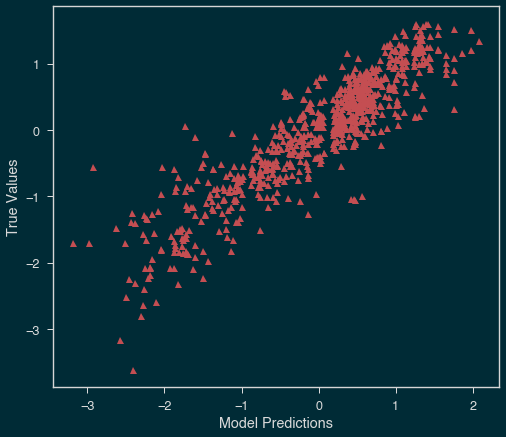

In [40]:
# Plot the scaled result...a pretty good fit visually
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [41]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

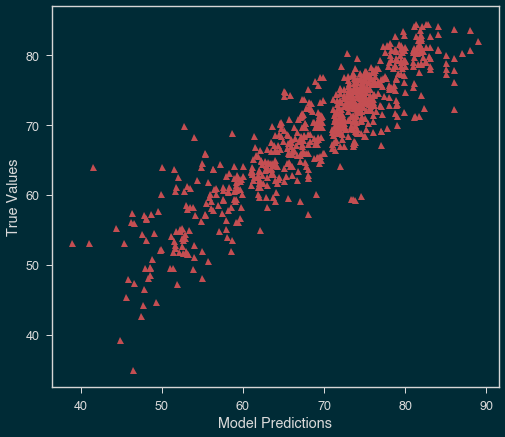

In [42]:
# Plot the original values
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [43]:
# Plot the evaluation KPIs
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 4.145 
MSE = 17.179987 
MAE = 3.0213287 
R2 = 0.8106494978961164 
Adjusted R2 = 0.8050725546363947
